datasetnya dari dosen
percobaan 

In [58]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [59]:
file_path = r"C:\Users\HP\Documents\data mining\dataset\produksiPadi.xlsx"
data = pd.read_excel(file_path)

data.head()

,Tahun,Produksi Padi(Ton)
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [60]:
# data['Produksi_lag0'] = data['Produksi Padi(Ton)'].shift(0)
# # shift 1 itu mulai dari tahun 1971, klo shift 0 mulia dari tahun 1970
# data['Produksi_lag1'] = data['Produksi Padi(Ton)'].shift(1)
# data['Produksi_lag2'] = data['Produksi Padi(Ton)'].shift(2)
# data['Produksi_lag3'] = data['Produksi Padi(Ton)'].shift(3)
# data['Produksi_lag4'] = data['Produksi Padi(Ton)'].shift(4)
# data['Produksi_lag5'] = data['Produksi Padi(Ton)'].shift(5)
# data['Produksi_lag6'] = data['Produksi Padi(Ton)'].shift(6)
# data['Produksi_lag7'] = data['Produksi Padi(Ton)'].shift(7)
# data['Produksi_lag8'] = data['Produksi Padi(Ton)'].shift(8)
# data['Produksi_lag9'] = data['Produksi Padi(Ton)'].shift(9)
# data['Produksi_lag10'] = data['Produksi Padi(Ton)'].shift(10)
# # data['Moving_Avg_3'] = data['Produksi Padi(Ton)'].rolling(window=3).mean()

# data_lagged = data.dropna().reset_index(drop=True)

# data_lagged.head()

# Create lagging features
for i in range(11):
    data[f'Produksi_lag{i}'] = data['Produksi Padi(Ton)'].shift(i)

data_lagged = data.dropna().reset_index(drop=True)

In [61]:
# Feature and target split
X = data_lagged[[f'Produksi_lag{i}' for i in range(11)]]
y = data_lagged['Produksi Padi(Ton)']


# # 
# X =data_lagged[['Produksi_lag0', 'Produksi_lag1', 'Produksi_lag2', 'Produksi_lag3', 'Produksi_lag4', 
#                 'Produksi_lag5', 'Produksi_lag6', 'Produksi_lag7','Produksi_lag8', 'Produksi_lag9', 'Produksi_lag10', ]]
# y = data_lagged['Produksi Padi(Ton)']

# Normalisasi data menggunakan Min-Max Scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Membagi dataset menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42, shuffle=False)

# #
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Menampilkan jumlah data pada setiap set
# (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [62]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Menyimpan koefisien dan intercept model
# coef = model.coef_
# # [0]
# intercept = model.intercept_


LinearRegression()

In [63]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model: MSE, RMSE, dan MAPE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}")

# mse, rmse, mape
# (coef, intercept, mse, rmse, mape)

MSE: 2.263146934812819e-16, RMSE: 1.5043759286869818e-08, MAPE: 1.9294237916659002e-16


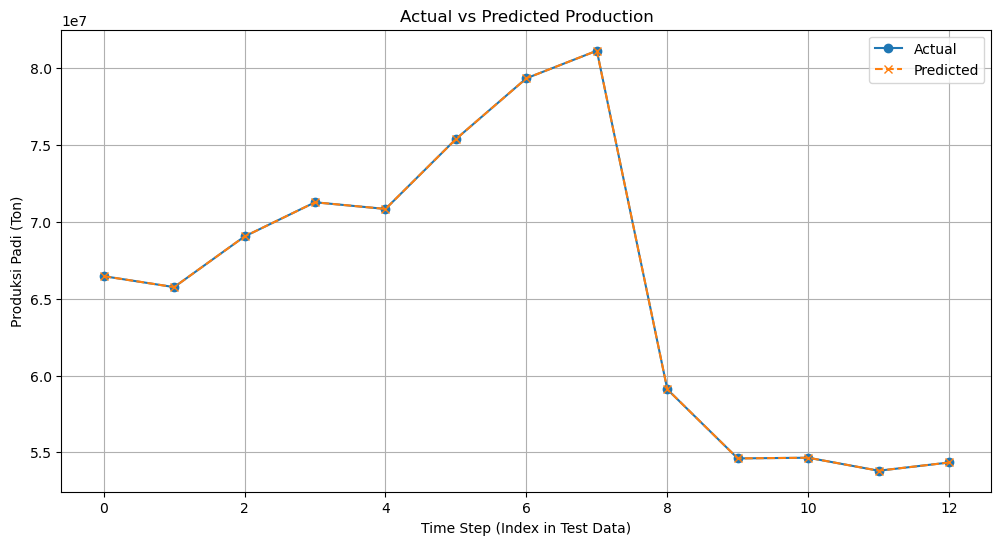

In [64]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", marker='o', linestyle='-')
plt.plot(y_pred, label="Predicted", marker='x', linestyle='--')
plt.title("Actual vs Predicted Production")
plt.xlabel("Time Step (Index in Test Data)")
plt.ylabel("Produksi Padi (Ton)")
plt.legend()
plt.grid(True)
plt.show()


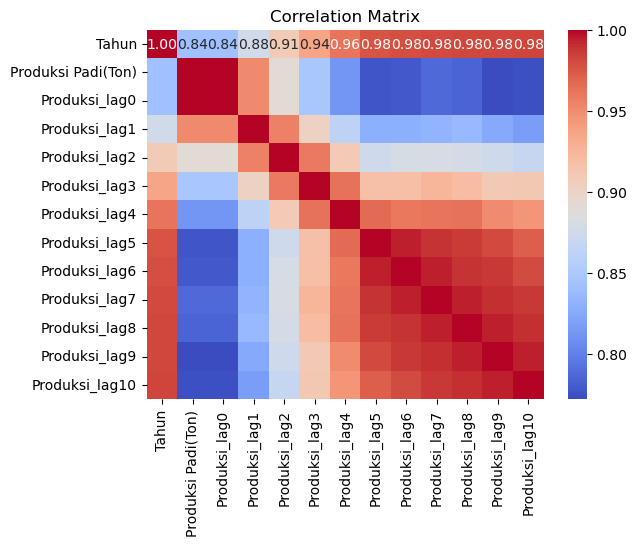

In [72]:
# feature selection : seleksi fitur dengan korelasi 
import seaborn as sns

correlation_matrix = data_lagged.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# hyperparameter tuning : ridge regression dengan gridsearchcv
# hasil tuning menunjukkan nilai aplha terbaik = 0.01, yg 
# menunjukkan sedikit regularisasi sdh cukup. 
# R-regression membantu dlm kasus multikolinearitas antara fitur, yg sering muncul pd data lagging
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Best Alpha:", grid_search.best_params_['alpha'])


Best Alpha: 0.01


In [ ]:
# non-linier models : random forest 
# menghasilkan mse yg sangat tinggi, hingga mencapai 96 T. hal ini menunjukkan
# bahwa model tidak cocok / mengalami overfitting/underfitting karena 
# skala data yg sangat besar / tdk dioptimalkan, perlu tuning lebih lanjut, contohnya
# max_depth, min_samples_split dll 
# tdk dipake 
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, MAPE: {mape_rf}")


Random Forest - MSE: 96536526025421.89, RMSE: 9825300.302047865, MAPE: 0.12311159154179054


In [ ]:
# time series-spesific models : lstm
# loss dari lstm sangat tinggi, menunjukkan model gagal mempelajari pola data dgn baik
# disebabkan : jumlah data terlalu kecil untuk model neural network,
# arsitektur lstm / hyperparameter tdk optimal, masalah skala data
# tdk dipake 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

# Reshape input data for LSTM [samples, time steps, features]
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=1)

# Predict
y_pred_lstm = model_lstm.predict(X_test_lstm)


Epoch 1/50


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2329252032675840.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2263325626859520.0000 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2277984081805312.0000 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2271317218820096.0000 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2271714771730432.0000 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2286658842001408.0000 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2307152546889728.0000 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2249518649180160.0000 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2330763324293120.0000 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2252947106824192.0000 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2251194491731968.0000 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2303645437657088.0000 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2327

R-squared: 0.9595074130718757


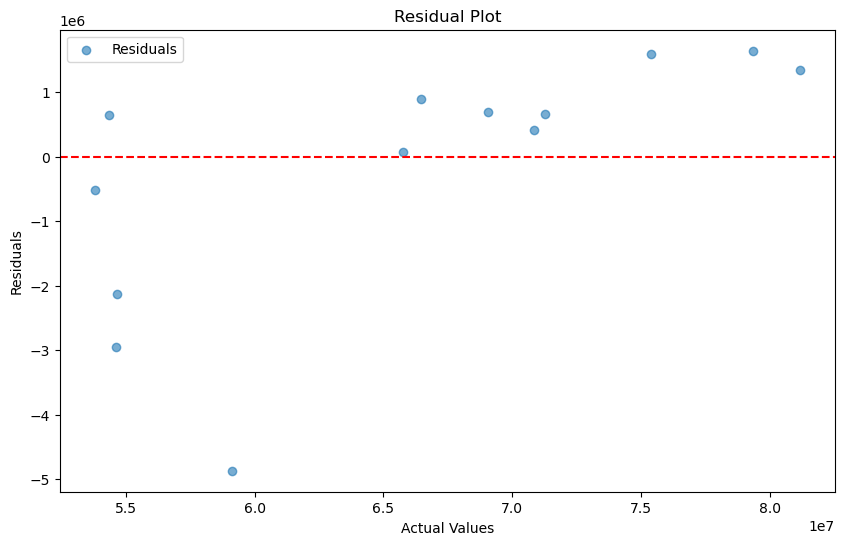

In [ ]:
# evaluation metrics : r-squared 
# mengindikasikan model dpt menjelaskan 95.95% variabilitas data target. menunjukkan model cukup kuat
# namun visualisasi residul plot masih salah 
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred, alpha=0.6, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()



In [ ]:
# cross-validation : timeseriessplit
# mse dari beberapa fold sangat kecil, hingga mendekati nol, yg tidak realistis
# disebabkan karena data terlalu kecil untuk menghasilkan variasi yang cukup antar fold
# tdk dipake 
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_normalized):
    X_train_cv, X_test_cv = X_normalized[train_index], X_normalized[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    mse_cv = mean_squared_error(y_test_cv, y_pred_cv)
    print(f"Fold MSE: {mse_cv}")


Fold MSE: 1435979516940.6616
Fold MSE: 2.3790493384824782e-17
Fold MSE: 1.3481279584734043e-15
Fold MSE: 7.93016446160826e-18
Fold MSE: 1.1387716166869463e-14
